In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [2]:
images = np.random.randint(
    low=0,
    high=256,
    size=(10, 5, 5, 3),
    dtype=np.uint8,
)

# plt.imshow(
#     images[0, ...]
# )

# standardization
images = (images / 255.).astype(np.float32)

In [6]:
PADDING_TYPE = {
    "same": "SAME",
    "none": "VALID",
}

In [4]:
l = Conv2D(
    96,
    kernel_size=3,
    padding=PADDING_TYPE["same"]
)

out = l(images)

print("input images shape=", images.shape)
print("output tensor shape=", out.shape)

input images shape= (10, 5, 5, 3)
output tensor shape= (10, 5, 5, 96)


In [7]:
l = Conv2D(
    96,
    kernel_size=3,
    padding=PADDING_TYPE["none"]
)

out = l(images)

print("input images shape=", images.shape)
print("output tensor shape=", out.shape)

input images shape= (10, 5, 5, 3)
output tensor shape= (10, 3, 3, 96)


---

* *Dense* input tensor shape= `[N, num_features]`
* *Conv2D* input tensor shape= `[N, H, W, C]`
* *Conv1D* input tensor shape= `[N, W, C]`
* *RNN* input tensor shape= `[N, time_steps, num_features]`

---

In [9]:
X = np.zeros((90,3))
for j in range(0,30):
    X[j,:] = 0.
for j in range(30,60):
    X[j,:] = 1.
for j in range(60,90):
    X[j,:] = 2.
y = X[:,0]

# # data standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_new = scaler.transform(X)

# # convert y into one-hot representation
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Reshape, Flatten, Conv1D

`[BS, 3]` ->

-> Dense(units=8)+relu -> `[BS, 8]`

-> Dense(units=8)+relu -> `[BS, 8]`

(上述兩個Dense的存在是為了把資料整理成適合Conv1D去學習的樣子, 這樣理論上比較適合Conv1D去學習)

-> reshape -> `[BS, 8, 1]` 

-> Conv1D(filters=32, padding=`SAME`)+relu -> `[BS, 8, 32]`

-> Conv1D(filters=32, padding=`SAME`)+relu -> `[BS, 8, 32]` 

-> flatten -> `[BS, 8*32]`

-> Dense(units=3)+softmax -> `[BS, 3]`

Epoch 1/100
6/6 [==============================] - 0s 15ms/step - loss: 1.0977 - accuracy: 0.3778
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.0699 - accuracy: 0.6778
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0459 - accuracy: 0.4333
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0119 - accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9740 - accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9248 - accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8593 - accuracy: 0.6667
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7940 - accuracy: 0.6667
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7339 - accuracy: 0.6667
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6667
Epoch 11/100
6/6 [=========

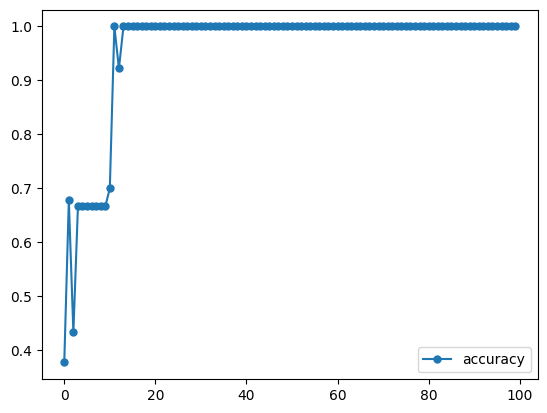

In [43]:
lr = 0.05
num_epochs = 100
act = 'relu'
num_kernels = 32
bs = 16

layers= [
    Dense(units=8, activation=act, input_shape=(3,)),
    Dense(units=8, activation=act),
    Reshape((8, 1)),
    Conv1D(num_kernels, kernel_size=2, activation=act, padding="SAME"),
    Conv1D(num_kernels, kernel_size=2, activation=act, padding="SAME"),
    Flatten(),
    Dense(units=3, activation='softmax'),
]

model = Sequential()
for layer in layers:
    model.add(layer)

# x_batch = X[:8, ...]

# print("input tensor shape=", x_batch.shape)
# print("output tensor shape=", model(x_batch).shape)

model.compile(
    loss="CategoricalCrossentropy",
    metrics=["accuracy"],
    optimizer=SGD(learning_rate=lr),
)

hist = model.fit(
    X,
    y_new,
    epochs=num_epochs,
    batch_size=bs,
)

# 畫出訓練過程
plt.plot(hist.history['accuracy'], ms=5, marker='o', label='accuracy')
plt.legend()
plt.show()